#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

#### Reading the data

In [2]:
data = pd.read_csv("Toyota_SimpleReg.csv", encoding = "ISO-8859-1")

####  Data pre-processing

In [3]:
data.head()

,Id,Model,Price,Age_06_15
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,57
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,57
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,58
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,60
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,64


In [4]:
data.tail()

,Id,Model,Price,Age_06_15
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,103
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,106
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,105
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,104
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,110


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 4 columns):
Id           1436 non-null int64
Model        1436 non-null object
Price        1436 non-null int64
Age_06_15    1436 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.0+ KB


In [6]:
data.describe()

,Id,Price,Age_06_15
count,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,89.947075
std,416.476890,3626.964585,18.599988
min,1.000000,4350.000000,35.000000
25%,361.750000,8450.000000,78.000000
50%,721.500000,9900.000000,95.000000
75%,1081.250000,11950.000000,104.000000
max,1442.000000,32500.000000,114.000000


####  Drop the Id, Model attributes:

In [7]:
data.drop(['Id', 'Model'], axis = 1, inplace = True)

In [8]:
data.head()

,Price,Age_06_15
0,13500,57
1,13750,57
2,13950,58
3,14950,60
4,13750,64


#### Checking the covariance between the price and age of the car

In [9]:
np.cov(data.Price, data.Age_06_15)

array([[ 1.31548721e+07, -5.91361089e+04],
       [-5.91361089e+04,  3.45959566e+02]])

In [10]:
#The covariance of the Age of car and Price is -59136.11. 
#It indicates a negative linear relationship between the two variables. 
#This relation could be observed from the scatter plot also.

Text(0,0.5,'Age_of_the_car')

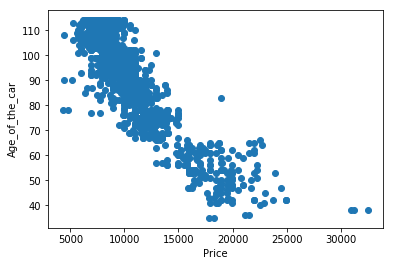

In [11]:
plt.scatter(data.Price, data.Age_06_15)
plt.xlabel('Price')
plt.ylabel('Age_of_the_car')

In [12]:
np.corrcoef(data.Price, data.Age_06_15)

array([[ 1.       , -0.8765905],
       [-0.8765905,  1.       ]])

In [13]:
#The correlation coefficient of the Age of car and Price is -0.8765905. 
#Since the value is close to 1 and has a -ve sign, we can conclude that the variables are strongly negatively correlated.

In [14]:
y = data.Price #define the target variable (dependent variable) as y

#### Split the data into train and test datasets

In [15]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1005, 2) (1005,)
(431, 2) (431,)


#### Fitting Simple Linear Regression Model to the training set

In [16]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

#### Predecting the Result

In [17]:
predictions = lm.predict(X_test)

In [18]:
predictions[0:5]

array([ 8950., 10950.,  8500., 16650.,  8950.])

#### Let’s plot the model:

Text(0,0.5,'Predictions')

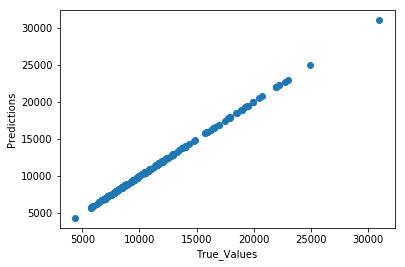

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

#### Print the accuracy

In [23]:
print("Score:", model.score(X_test, y_test))

Score: 1.0
